In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
f_birth = pd.read_csv('daily-total-female-births-in-cal.csv', index_col = [0], parse_dates = [0])
# Date column should be properly parsed

In [5]:
# Print the First 5 data from dataset
f_birth.head()

,"Daily total female births in California, 1959"
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [6]:
type(f_birth)

pandas.core.frame.DataFrame

In [7]:
# Convert the data into the numpy array
series_value = f_birth.values

In [9]:
type(series_value)

numpy.ndarray

In [10]:
f_birth.size

366

In [11]:
# Print the last 5 data from data set
f_birth.tail()

,"Daily total female births in California, 1959"
Date,
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50
Daily total female births in California,1959


In [12]:
f_birth.describe()

,"Daily total female births in California, 1959"
count,366.000000
mean,47.218579
std,100.472534
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,1959.000000


In [14]:
# From the last five data we can observe that last row is act as outlier, so remove it
f_birth = f_birth[0: 365]

In [15]:
f_birth.describe()

,"Daily total female births in California, 1959"
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


<AxesSubplot:xlabel='Date'>

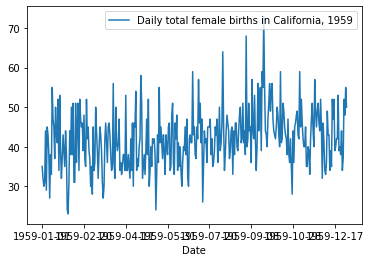

In [16]:
f_birth.plot()

In [23]:
# Moving Average
f_birth_mean = f_birth.rolling(window = 30).mean()

<AxesSubplot:xlabel='Date'>

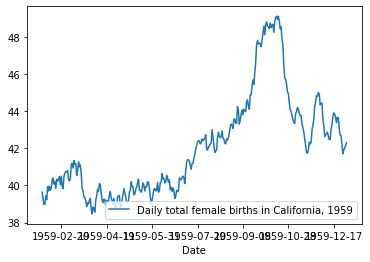

In [24]:
f_birth_mean.plot()

In [32]:
# What is base line model?
# Baseline models are typically straightforward and often rely on minimal assumptions about the underlying data.
birth_df = pd.concat([f_birth, f_birth.shift(1)], axis = 1)

In [33]:
birth_df.head()

,"Daily total female births in California, 1959","Daily total female births in California, 1959"
Date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


In [34]:
birth_df.columns = ['Actual_birth', 'Forecast_birth']

In [35]:
birth_df.head()

,Actual_birth,Forecast_birth
Date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


In [36]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [37]:
# Remove the first row for find the error, because it has NaN
birth_test = birth_df[1:]

In [39]:

birth_test.head()

,Actual_birth,Forecast_birth
Date,,
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0
1959-01-06,29,44.0


In [40]:
birth_error = mean_squared_error(birth_test.Actual_birth, birth_test.Forecast_birth)

In [41]:
birth_error

84.22252747252747

In [43]:
np.sqrt(birth_error)

9.177283229394606

### ARIMA - Autoregrassive Integrated Moving Average
#### Autoregrassive value p
#### Integrated value d
#### Moving Average value q

In [44]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

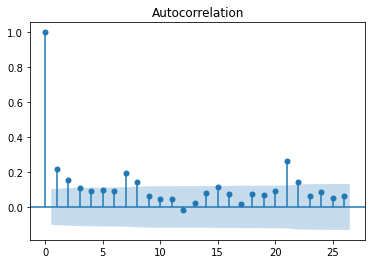

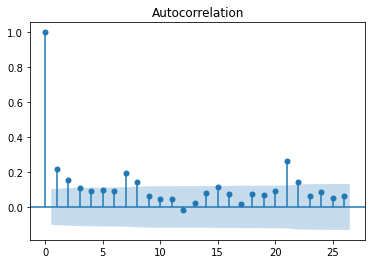

In [45]:
# plot_acf is to identify parameter Q
# ARIMA(p, d, q)

plot_acf(f_birth)

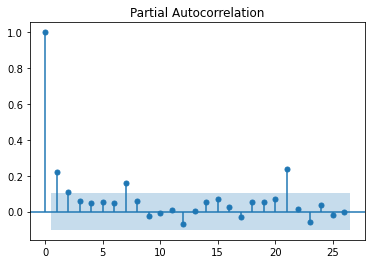

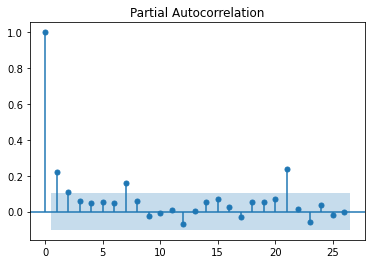

In [46]:
plot_pacf(f_birth) # To identify the value of p

In [47]:
# p = 2, 3 d = 0 & q = 3, 4
f_birth.size

365

In [49]:
birth_train = f_birth[0: 330]
birth_test = f_birth[330: 365]

In [50]:
birth_train.size

330

In [51]:
birth_test.size

35

In [52]:
from statsmodels.tsa.arima_model import ARIMA

In [82]:
birth_model = ARIMA(birth_train, order = (3, 1, 4))

In [83]:
birth_model_fit = birth_model.fit()

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [84]:
birth_model_fit.aic
# The combination of the values (p, d, q) is give the lesser aic value that model is the best model

2225.022579566067

In [85]:
birth_forecast = birth_model_fit.forecast(steps = 35)[0]

In [86]:
birth_forecast

array([43.89895141, 44.07208609, 44.40842059, 45.38474489, 45.58224837,
       45.54032166, 44.65903544, 44.24759315, 44.02360995, 44.7533225 ,
       45.33078547, 45.88096712, 45.47619846, 44.95082198, 44.22387835,
       44.33480787, 44.74982325, 45.6126456 , 45.85490926, 45.72647542,
       44.93971096, 44.49348116, 44.36238351, 45.01959254, 45.62958677,
       46.08462713, 45.73012659, 45.16784161, 44.53247371, 44.6126331 ,
       45.073372  , 45.85443417, 46.11321605, 45.92868976, 45.20850891])

In [87]:
birth_test.head()

,"Daily total female births in California, 1959"
Date,
1959-11-27,51
1959-11-28,46
1959-11-29,44
1959-11-30,52
1959-12-01,45


In [88]:
np.sqrt(mean_squared_error(birth_test, birth_forecast))

6.6171077386863875